## Correlation between different indicators and number of beds

**Import library and file**

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

logfile_path = '../website/data/swiss_indicators_2020.csv'
df = pd.DataFrame(pd.read_csv(logfile_path))
print(df)

    id  population     gdp       beds     doctors
0   ZH    1520.968   95608   4.097819  261.412469
1   BE    1034.977   76085   4.834504  224.932535
2   LU     409.557   66655   3.845010  177.264703
3   UR      36.433   52468   1.729202  112.535339
4   SZ     159.165   60313   2.104734  146.388967
5   OW      37.841   66970   1.329210  124.203906
6   NW      43.223   71329   2.304329  122.619901
7   GL      40.403   68671   3.644108  138.603569
8   ZG     126.837  151747   4.470304  208.929571
9   FR     318.714   59444   2.716697  145.271309
10  SO     273.194   65459   2.512420  161.057710
11  BS     194.766  185826  11.132038  440.015198
12  BL     288.132   71065   3.398652  245.026585
13  SH      81.991   85895   3.543389  191.484431
14  AR      55.234   56038   8.975760  175.616468
15  AI      16.145   61633   2.023443  123.877361
16  SG     507.697   73059   4.527709  195.392133
17  GR     198.379   70909   5.694193  188.528020
18  AG     678.207   62337   4.542744  170.744330


In [2]:
cols = ['population', 'gdp', 'beds', 'doctors']  
for col in cols: 
    df[col] = pd.to_numeric(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          26 non-null     object 
 1   population  26 non-null     float64
 2   gdp         26 non-null     int64  
 3   beds        26 non-null     float64
 4   doctors     26 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


**GDP per capita and number of beds**

In [4]:
ordered_gdp = df['gdp'].sort_values()
ordered_gdpArr = ordered_gdp.to_numpy()
index_array = np.argsort(df['gdp'].to_numpy())
bedsPerGDP = []
popPerGDP = []
label = []

for i in range(index_array.size):
    bedsPerGDP.append(df.iloc[0:,3][index_array[i]])
    label.append(df.iloc[0:,0][index_array[i]])
    popPerGDP.append(df.iloc[0:,1][index_array[i]])

marker_size = np.power(popPerGDP,2) / 800
color = []
for i in range(ordered_popArr.size):
    if(popPerGDP[i] > np.mean(popPerGDP)):
        color.append('r')
    else:
        color.append('b')

fig, ax = plt.subplots()
ax.scatter(ordered_gdpArr,bedsPerGDP, c = color, s = marker_size, alpha = 0.2)

for i, txt in enumerate(label):
    ax.annotate(txt, (ordered_gdpArr[i], bedsPerGDP[i]))
plt.show()

NameError: name 'ordered_popArr' is not defined

**Population and number of beds**

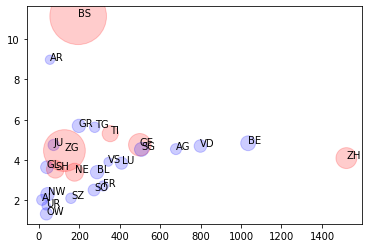

In [5]:
ordered_pop = df['population'].sort_values()
ordered_popArr = ordered_pop.to_numpy()

label = []

index_array = np.argsort(df['population'].to_numpy())
bedsPerPop = []
gdpPerPop = []

for i in range(ordered_popArr.size):
    bedsPerPop.append(df.iloc[0:,3][index_array[i]])
    label.append(df.iloc[0:,0][index_array[i]])
    gdpPerPop.append(df.iloc[0:,2][index_array[i]]/1000)
   
color = []
for i in range(ordered_popArr.size):
    if(gdpPerPop[i] > np.mean(gdpPerPop)):
        color.append('r')
    else:
        color.append('b')
            
marker_size = np.power(gdpPerPop,3) / 2000

fig, ax = plt.subplots()
ax.scatter(ordered_popArr,bedsPerPop, c=color, s=marker_size, alpha=0.2)

for i, txt in enumerate(label):
    ax.annotate(txt, (ordered_popArr[i], bedsPerPop[i]))

plt.show()

In [ ]:
logfile_path = '../website/data/swiss_icu_2020.csv'
df = pd.DataFrame(pd.read_csv(logfile_path))
print(df.head())

cols = ['population', 'gdp', 'ICUbefore', 'ICUafter']  
for col in cols: 
    df[col] = pd.to_numeric(df[col])

**Comparison of resources before and during covid**

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cantons = np.array(df["id"])
values = np.array(df["ICUbefore"])
valuesAfter = np.array(df["ICUafter"])
ax.bar(cantons,valuesAfter, color ="r", alpha= 0.5)
ax.bar(cantons,values, color="b", alpha = 0.5)
plt.legend(["ICU beds in May", "ICU beds in March"])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
index_array = np.argsort(df['ICUafter'].to_numpy())

cantons = []
values = []
valuesAfter = []

for i in range(index_array.size):
    cantons.append(df["id"][index_array[i]])
    values.append(df["ICUbefore"][index_array[i]])
    valuesAfter.append(df["ICUafter"][index_array[i]])
    
ax.bar(cantons,valuesAfter, color ="r", alpha= 0.5)
ax.bar(cantons,values, color="b", alpha = 0.5)
plt.legend(["ICU beds in May", "ICU beds in March"])
plt.title("Total number of ICU beds")
plt.show()

# NORMALIZED
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
index_array = np.argsort((df['ICUafter'] / df['population']).to_numpy())

total_pop = np.sum(df['population'].to_numpy())
total_bed = np.sum(df['ICUafter'].to_numpy())

cantons = []
values = []
valuesAfter = []

for i in range(index_array.size):
    cantons.append(df["id"][index_array[i]])
    values.append(df["ICUbefore"][index_array[i]] / df["population"][index_array[i]])
    valuesAfter.append(df["ICUafter"][index_array[i]] / df["population"][index_array[i]])
    
ax.bar(cantons,valuesAfter, color ="r", alpha= 0.5)
ax.bar(cantons,values, color="b", alpha = 0.5)
plt.legend(["ICU beds in May", "ICU beds in March"])
plt.title("Normalized number of ICU beds per population")
plt.show()